<a href="https://colab.research.google.com/github/JoMihura/rata/blob/main/International_matches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import altair as alt
import numpy as np
import seaborn as sns              
import matplotlib.pyplot as plt             
  

url = 'https://raw.githubusercontent.com/JoMihura/rata/main/international_matches.csv'
df = pd.read_csv(url)
print(df.head(5))

       date home_team     away_team home_team_continent away_team_continent  \
0  8/8/1993   Bolivia       Uruguay       South America       South America   
1  8/8/1993    Brazil        Mexico       South America       North America   
2  8/8/1993   Ecuador     Venezuela       South America       South America   
3  8/8/1993    Guinea  Sierra Leone              Africa              Africa   
4  8/8/1993  Paraguay     Argentina       South America       South America   

   home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
0                   59                   22                            0   
1                    8                   14                            0   
2                   35                   94                            0   
3                   65                   86                            0   
4                   67                    5                            0   

   away_team_total_fifa_points  home_team_score  ...  shoot_out  \
0

In [ ]:
sns.set(color_codes=True)
print(df.head(5))

       date home_team     away_team home_team_continent away_team_continent  \
0  8/8/1993   Bolivia       Uruguay       South America       South America   
1  8/8/1993    Brazil        Mexico       South America       North America   
2  8/8/1993   Ecuador     Venezuela       South America       South America   
3  8/8/1993    Guinea  Sierra Leone              Africa              Africa   
4  8/8/1993  Paraguay     Argentina       South America       South America   

   home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
0                   59                   22                            0   
1                    8                   14                            0   
2                   35                   94                            0   
3                   65                   86                            0   
4                   67                    5                            0   

   away_team_total_fifa_points  home_team_score  ...  shoot_out  \
0

In [ ]:
print(df.dtypes) # Visualizar que tipos de datos tiene cada una de las columnas

date                              object
home_team                         object
away_team                         object
home_team_continent               object
away_team_continent               object
home_team_fifa_rank                int64
away_team_fifa_rank                int64
home_team_total_fifa_points        int64
away_team_total_fifa_points        int64
home_team_score                    int64
away_team_score                    int64
tournament                        object
city                              object
country                           object
neutral_location                    bool
shoot_out                         object
home_team_result                  object
home_team_goalkeeper_score       float64
away_team_goalkeeper_score       float64
home_team_mean_defense_score     float64
home_team_mean_offense_score     float64
home_team_mean_midfield_score    float64
away_team_mean_defense_score     float64
away_team_mean_offense_score     float64
away_team_mean_m

In [ ]:
# Se eliminan ciertas columnas que no son necesarias para el analisis. A su vez, solo la mitad de los datos contienen esta informacion
df = df.drop(['home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_defense_score','away_team_mean_offense_score', 'away_team_mean_midfield_score'], axis=1) 


In [ ]:
df.head(5) 

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result
0,8/8/1993,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win
1,8/8/1993,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw
2,8/8/1993,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win
3,8/8/1993,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win
4,8/8/1993,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose


In [ ]:
df.shape # Conteo de columnas y filas

(23921, 17)

In [ ]:
# Se renombran las columnas para un mejor entendimiento. 
df = df.rename(columns={"date": "Date", "home_team": "Home Team(HT)", "AT": "Away Team(AT)","home_team_continent": "HT Continent","away_team_continent": "AT Continent", "home_team_fifa_rank": "HT Fifa Rank", "away_team_fifa_rank": "AT Fifa Rank", "home_team_total_fifa_points": "HT Fifa Points", "away_team_total_fifa_points": "AT Fifa Points", "home_team_score": "HT Score", "away_team_score": "AT Score", "tournament": "Tournament", "city": "City", "country": "Country", "neutral_location": "Neutral Location", "shoot_out": "Shoot Out", "home_team_result": "HT Result"})
df.head(5)

,Date,Home Team (HT),Away Team(AT),HT Continent,AT Continent,HT Fifa Rank,AT Fifa Rank,HT Fifa Points,AT Fifa Points,HT Score,AT Score,Tournament,City,Country,Neutral Location,Shoot Out,HT Result
0,8/8/1993,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win
1,8/8/1993,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw
2,8/8/1993,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win
3,8/8/1993,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win
4,8/8/1993,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose


In [ ]:
# Conteo para verificar si hay alguna fila repetida
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 17)


In [ ]:
#Contamos la cantidad de filas de cada columna y nos aseguramos que sean todas iguales.
df.count()

date                           23921
home_team                      23921
away_team                      23921
home_team_continent            23921
away_team_continent            23921
home_team_fifa_rank            23921
away_team_fifa_rank            23921
home_team_total_fifa_points    23921
away_team_total_fifa_points    23921
home_team_score                23921
away_team_score                23921
tournament                     23921
city                           23921
country                        23921
neutral_location               23921
shoot_out                      23921
home_team_result               23921
dtype: int64

In [ ]:
# Se buscan posibles valores nulos.
print(df.isnull().sum()) 

date                           0
home_team                      0
away_team                      0
home_team_continent            0
away_team_continent            0
home_team_fifa_rank            0
away_team_fifa_rank            0
home_team_total_fifa_points    0
away_team_total_fifa_points    0
home_team_score                0
away_team_score                0
tournament                     0
city                           0
country                        0
neutral_location               0
shoot_out                      0
home_team_result               0
dtype: int64


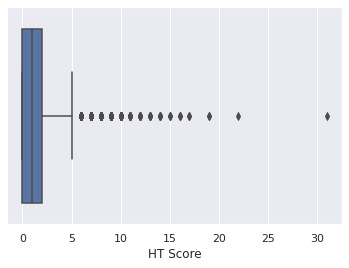

In [ ]:
# Identificacion de outliers. Nos permitira encontrar valores que tal vez fueron agregados por error o valores por fuera de la media. 
# Se buscan outliers de los goles de cada equipo, comenzando por el equipo local. 
sns.boxplot(x=df['HT Score'])

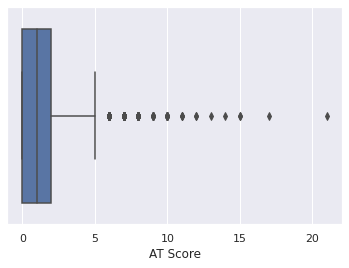

In [ ]:
# Outliers del equipo visitante
sns.boxplot(x=df['AT Score'])

**Partidos con mas goles del equipo local y mas goles del equipo visitante**

In [52]:
df['HT Score'].max()

31

In [70]:
df[df['HT Score'] == 31.0]

,Date,Home Team (HT),Away Team(AT),HT Continent,AT Continent,HT Fifa Rank,AT Fifa Rank,HT Fifa Points,AT Fifa Points,HT Score,AT Score,Tournament,City,Country,Neutral Location,Shoot Out,HT Result
5410,4/11/2001,Australia,American Samoa,Oceania,Oceania,77,203,0,0,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,No,Win


In [53]:
df['AT Score'].max()

21

In [72]:
df[df['AT Score'] == 21.0]

,Date,Home Team (HT),Away Team(AT),HT Continent,AT Continent,HT Fifa Rank,AT Fifa Rank,HT Fifa Points,AT Fifa Points,HT Score,AT Score,Tournament,City,Country,Neutral Location,Shoot Out,HT Result
8740,3/11/2005,Guam,Korea DPR,Asia,Asia,205,95,0,0,0,21,EAFF Championship,Taipei,Chinese Taipei,True,No,Lose


**TOP 10 equipos mas ganadores**

In [90]:
# Se seleccion los campos necesarios para crear un nuevo data frame

home_team = df[['Date','Home Team (HT)','HT Score','AT Score']]

home_team.head(20)

,Date,Home Team (HT),HT Score,AT Score
0,8/8/1993,Bolivia,3,1
1,8/8/1993,Brazil,1,1
2,8/8/1993,Ecuador,5,0
3,8/8/1993,Guinea,1,0
4,8/8/1993,Paraguay,1,3
5,8/8/1993,Peru,0,1
6,8/8/1993,Zimbabwe,2,0
7,8/9/1993,Guinea,4,0
8,8/11/1993,Faroe Islands,0,7
9,8/11/1993,Sweden,1,2


In [91]:
# Se muestra todos los equipos que ganaron su partido de local
home_team['HT Score']>home_team['AT Score']
homewins = home_team.loc[df['HT Score']>home_team['AT Score']]
homewins

,Date,Home Team (HT),HT Score,AT Score
0,8/8/1993,Bolivia,3,1
2,8/8/1993,Ecuador,5,0
3,8/8/1993,Guinea,1,0
6,8/8/1993,Zimbabwe,2,0
7,8/9/1993,Guinea,4,0
...,...,...,...,...
23908,6/14/2022,Netherlands,3,2
23912,6/14/2022,Bosnia and Herzegovina,3,2
23915,6/14/2022,Turkey,2,0
23916,6/14/2022,Moldova,2,1


In [92]:
# Se buscan los equipos que ganaron de visitante
home_team['HT Score']<home_team['AT Score']
homeloss = home_team.loc[home_team['HT Score']<home_team['AT Score']]
homeloss

,Date,Home Team (HT),HT Score,AT Score
4,8/8/1993,Paraguay,1,3
5,8/8/1993,Peru,0,1
8,8/11/1993,Faroe Islands,0,7
9,8/11/1993,Sweden,1,2
26,8/31/1993,Iceland,0,1
...,...,...,...,...
23909,6/14/2022,Poland,0,1
23910,6/14/2022,Armenia,1,4
23913,6/14/2022,Romania,0,3
23917,6/14/2022,Liechtenstein,0,2


In [103]:
# Se juntan las tabalas 
hometeam_wins = homewins[['Date', 'Home Team (HT)','HT Score', 'AT Score']].rename(columns = {'Home Team (HT)' : 'Team','HT Score': 'Home_team_win', 'AT Score' :'Away_team_win'})
awayteam_wins = homeloss[['Date', 'Home Team (HT)','HT Score', 'AT Score']].rename(columns = {'Home Team (HT)': 'Team','HT Score': 'Home_team_win', 'AT Score' :'Away_team_win'})
Team_streak = hometeam_wins.append(awayteam_wins)

Team_streak


,Date,Team,Home_team_win,Away_team_win
0,8/8/1993,Bolivia,3,1
2,8/8/1993,Ecuador,5,0
3,8/8/1993,Guinea,1,0
6,8/8/1993,Zimbabwe,2,0
7,8/9/1993,Guinea,4,0
...,...,...,...,...
23909,6/14/2022,Poland,0,1
23910,6/14/2022,Armenia,1,4
23913,6/14/2022,Romania,0,3
23917,6/14/2022,Liechtenstein,0,2


In [102]:
# Se ordenan los valores
top_streak = Team_streak.sort_values(by=['team','Date'],ascending = [False,True])
top_streak

,Date,team,Home_team_win,away_team_win
2029,1/12/1997,Zimbabwe,3,0
5132,1/14/2001,Zimbabwe,1,2
23388,1/18/2022,Zimbabwe,2,1
18340,1/19/2016,Zimbabwe,0,1
699,1/22/1995,Zimbabwe,4,1
...,...,...,...,...
16228,8/20/2013,Afghanistan,3,0
11633,8/3/2008,Afghanistan,0,4
21562,9/10/2019,Afghanistan,1,0
16239,9/2/2013,Afghanistan,3,0


In [110]:
# Finalmente se muestra el equipo que mas gano
top_streak['team'].value_counts().nlargest(10)

# El equipo que mas veces gano es la seleccion de Estados Unidos

USA                     253
Mexico                  243
Saudi Arabia            219
Japan                   211
Egypt                   195
Brazil                  195
Qatar                   187
Korea Republic          186
United Arab Emirates    182
Oman                    179
Name: team, dtype: int64

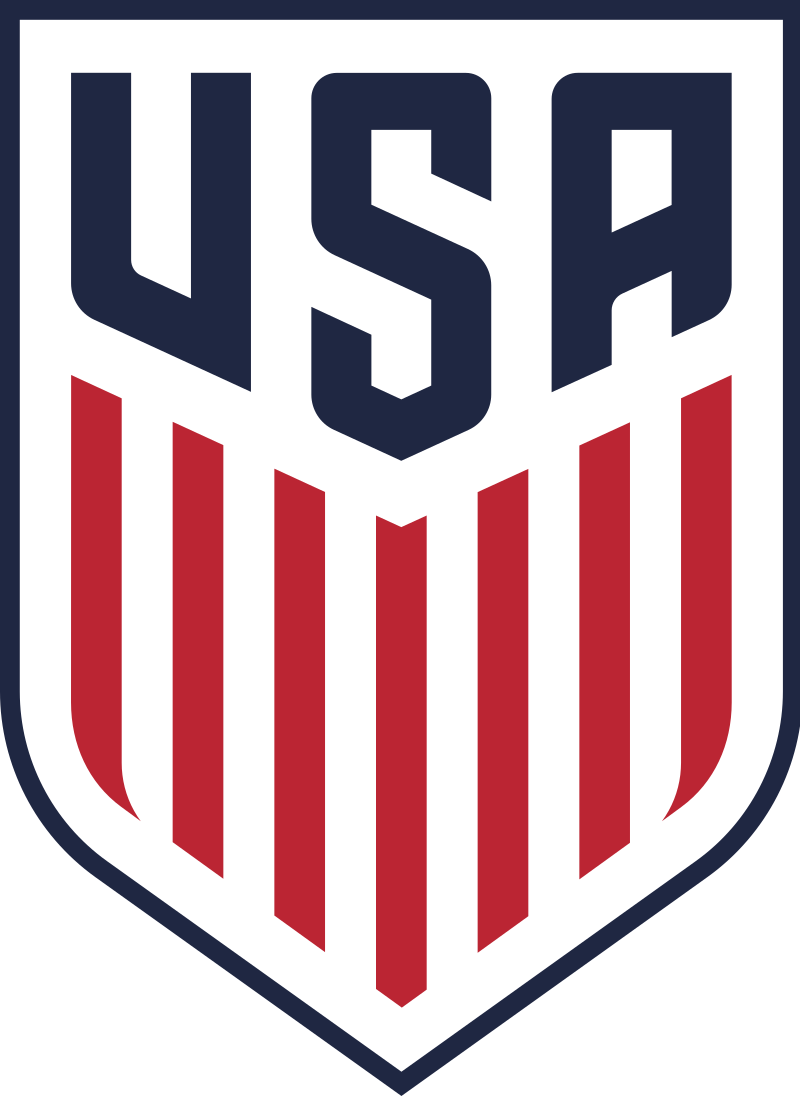

**Existe alguna ventaja por ser equipo local?**

In [118]:
home_team_advantage = df[df['Neutral Location']==False]['HT Result'].value_counts(normalize=True)


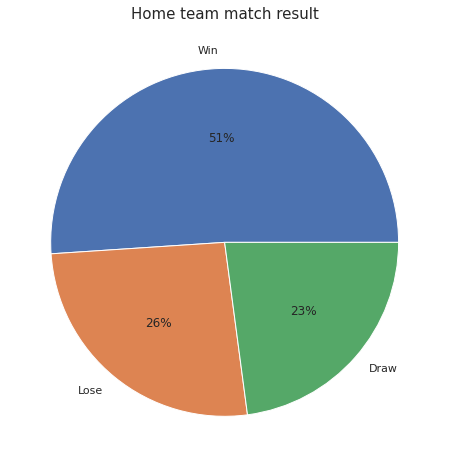

In [119]:
# Funcion para realizar el grafico de toratas indicando el porcentaje de victorias, empates y derrotas del equipo local. 
fig, axes = plt.subplots(1,1,  figsize=(8,8))
ax =plt.pie(home_team_advantage  ,labels = ['Win',  'Lose', 'Draw'],  autopct='%.0f%%')
plt.title('Home team match result', fontsize = 15)
plt.show()

**TOP 10 Historical Ranking FIFA points**

In [182]:
# se cra un nuevo data frame llamado fifa_points que muestra los n valores (en este caso se han seleccionado 10) mas grandes. La columna seleccionada es HT Fifa Points
fifa_points = df.nlargest(10, 'HT Fifa Points')

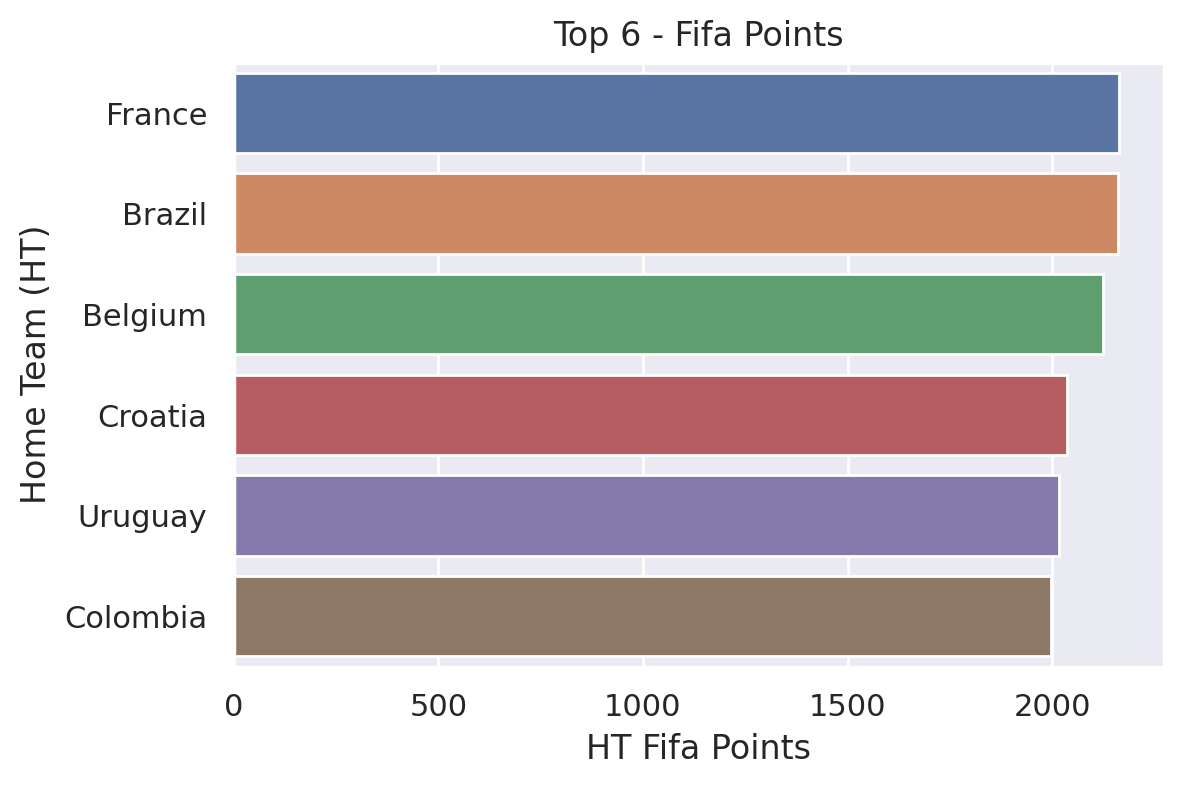

In [183]:
plt.figure(figsize=(6,4),dpi=200)
sns.barplot(data=fifa_points.head(10),y='Home Team (HT)',x='HT Fifa Points')
plt.title("Top 6 - Fifa Points");

**TOP 10 Actual Ranking FIFA points**

In [131]:
fifa_rank = df[['Date', 'Home Team (HT)', 'Away Team(AT)', 'HT Fifa Rank', 'AT Fifa Rank', 'AT Fifa Points', 'HT Fifa Points']]
home = fifa_rank[['Date', 'Home Team (HT)','HT Fifa Rank','HT Fifa Points']].rename(columns = {'Home Team (HT)': 'team', 'HT Fifa Rank' : 'rank','HT Fifa Points' : 'rank_points' })
away = fifa_rank[['Date', 'Away Team(AT)','AT Fifa Rank','AT Fifa Points']].rename(columns = {'Away Team(AT)': 'team', 'AT Fifa Rank' : 'rank','AT Fifa Points' : 'rank_points' })
fifa_rank = home.append(away)

In [142]:
fifa_rank  = fifa_rank.sort_values(['team', 'Date'], ascending=[True, False])
fifa_rank['row_number'] = fifa_rank.groupby('team').cumcount()+1
fifa_rank_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'rank')

In [143]:
fifa_rank_top

,Date,team,rank,rank_points
21525,9/9/2019,Belgium,1,1746
20535,9/9/2018,France,1,1726
22999,9/9/2021,Brazil,2,1797
12659,9/9/2009,Spain,2,0
22998,9/9/2021,Argentina,6,1714
21520,9/9/2019,Croatia,7,1625
12636,9/9/2009,England,7,0
20537,9/9/2018,Denmark,9,1580
12660,9/9/2009,USA,11,0
12649,9/9/2009,Greece,12,0


Se busco otra manera de determinar el ranking, en este caso con las seleeciones que estarn en el mundial de Qatar 2022. Ambos no salieron como se esperaba. Lamentablemente no encontramos el error en ninguno de los casos. De todas maneras se dejan ambas resoluciones. 

In [146]:
fifa2022_teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands',
                  'England', 'IR Iran', 'USA', 'Wales',
                  'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
                  'France', 'Australia', 'Denmark', 'Tunisia',
                  'Spain', 'Costa Rica', 'Germany', 'Japan',
                  'Belgium', 'Canada', 'Morocco', 'Croatia',
                  'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
                  'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']
print(fifa2022_teams)

['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'IR Iran', 'USA', 'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France', 'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']


In [149]:
columns_contains_null = [col for col in df.columns if df[col].isnull().any()]
print(f'Columns contain \'null\' values: \n\n{columns_contains_null}')

Columns contain 'null' values: 

[]


In [150]:
for x in fifa2022_teams:
    for y in columns_contains_null:
         df[y].fillna(df[df[y[0:9]]==x][y].mean(), inplace=True)

In [151]:
ranks = []
for x in fifa2022_teams:
    rank_df = df[(df['Home Team (HT)']== x) | (df['Away Team(AT)']== x)].sort_values(['Date','HT Fifa Rank','AT Fifa Rank'], ascending=[False,True,True]).iloc[0]
    if rank_df['Home Team (HT)']==x:
        rank = rank_df['HT Fifa Rank']
    else:
        rank = rank_df['AT Fifa Rank']
    ranks.append(rank)

team_ranks = pd.DataFrame({'Team':fifa2022_teams, 'Rank': ranks}).sort_values('Rank').reset_index(drop=True)
team_ranks.index += 1
team_ranks

,Team,Rank
1,France,1
2,Belgium,1
3,Spain,2
4,Brazil,2
5,Argentina,6
6,Croatia,7
7,England,7
8,Denmark,9
9,USA,11
10,Uruguay,13


**Porcentaje de victorias por equipo**

In [152]:
hwins, hdraws, hloses = [], [], []
awins, adraws, aloses = [], [], []
for team in fifa2022_teams:
    home_win = df[df['Home Team (HT)']==team][df['HT Result']=='Win'].shape[0]
    home_draw = df[df['Home Team (HT)']==team][df['HT Result']=='Draw'].shape[0]
    home_lose = df[df['Home Team (HT)']==team][df['HT Result']=='Lose'].shape[0]
    
    away_win = df[df['Away Team(AT)']==team][df['HT Result']=='Lose'].shape[0]
    away_draw = df[df['Away Team(AT)']==team][df['HT Result']=='Draw'].shape[0]
    away_lose = df[df['Away Team(AT)']==team][df['HT Result']=='Win'].shape[0]  
    
    hwins.append(home_win)
    hdraws.append(home_draw)
    hloses.append(home_lose)
    
    awins.append(away_win)
    adraws.append(away_draw)
    aloses.append(away_lose)
    
    wins = np.add(hwins,awins)
    draws = np.add(hdraws,adraws)
    loses = np.add(hloses,aloses)

    
win_draw_lose = pd.DataFrame({'Team':fifa2022_teams, 'Win': wins, 'Draw': draws, 'Lose': loses,
                              'Home win': hwins, 'Home draw': hdraws, 'Home lose': hloses,
                              'Away win': awins, 'Away draw': adraws, 'Away lose': aloses})

win_draw_lose.insert(1, 'Total', win_draw_lose['Win']+win_draw_lose['Draw']+win_draw_lose['Lose'])
win_draw_lose.insert(8, 'Total Home', win_draw_lose['Home win']+win_draw_lose['Home draw']+win_draw_lose['Home lose'])
win_draw_lose.insert(12, 'Total Away', win_draw_lose['Away win']+win_draw_lose['Away draw']+win_draw_lose['Away lose'])

win_draw_lose['Win %'] = np.around(100*win_draw_lose['Win']/win_draw_lose['Total'], 2)
win_draw_lose['Draw %'] = np.round(100*win_draw_lose['Draw']/win_draw_lose['Total'], 2)
win_draw_lose['Lose %'] = np.round(100*win_draw_lose['Lose']/win_draw_lose['Total'], 2)

win_draw_lose['Home Win %'] = np.round(100*win_draw_lose['Home win']/win_draw_lose['Total Home'], 2)
win_draw_lose['Home Draw %'] = np.round(100*win_draw_lose['Home draw']/win_draw_lose['Total Home'], 2)
win_draw_lose['Home Lose %'] = np.round(100*win_draw_lose['Home lose']/win_draw_lose['Total Home'], 2)

win_draw_lose['Away Win %'] = np.round(100*win_draw_lose['Away win']/win_draw_lose['Total Away'], 2)
win_draw_lose['Away Draw %'] = np.round(100*win_draw_lose['Away draw']/win_draw_lose['Total Away'], 2)
win_draw_lose['Away Lose %'] = np.round(100*win_draw_lose['Away lose']/win_draw_lose['Total Away'], 2)
win_draw_lose = win_draw_lose.sort_values('Win %', ascending=False).reset_index(drop=True)
win_draw_lose.index += 1
win_draw_lose.style.set_properties(**{'background-color': 'gray', 'color':'yellow'}, subset=['Home win','Home Win %','Win %'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


,Team,Total,Win,Draw,Lose,Home win,Home draw,Home lose,Total Home,Away win,Away draw,Away lose,Total Away,Win %,Draw %,Lose %,Home Win %,Home Draw %,Home Lose %,Away Win %,Away Draw %,Away Lose %
1,Brazil,433,301,76,56,181,31,21,233,120,45,35,200,69.520000,17.550000,12.930000,77.680000,13.300000,9.010000,60.000000,22.500000,17.500000
2,Spain,354,246,64,44,145,27,17,189,101,37,27,165,69.490000,18.080000,12.430000,76.720000,14.290000,8.990000,61.210000,22.420000,16.360000
3,France,370,230,83,57,145,44,32,221,85,39,25,149,62.160000,22.430000,15.410000,65.610000,19.910000,14.480000,57.050000,26.170000,16.780000
4,Germany,390,240,82,68,139,44,36,219,101,38,32,171,61.540000,21.030000,17.440000,63.470000,20.090000,16.440000,59.060000,22.220000,18.710000
5,IR Iran,366,217,79,70,133,31,27,191,84,48,43,175,59.290000,21.580000,19.130000,69.630000,16.230000,14.140000,48.000000,27.430000,24.570000
6,Netherlands,340,201,74,65,119,40,33,192,82,34,32,148,59.120000,21.760000,19.120000,61.980000,20.830000,17.190000,55.410000,22.970000,21.620000
7,Portugal,336,198,79,59,123,37,24,184,75,42,35,152,58.930000,23.510000,17.560000,66.850000,20.110000,13.040000,49.340000,27.630000,23.030000
8,Argentina,367,216,79,72,130,36,24,190,86,43,48,177,58.860000,21.530000,19.620000,68.420000,18.950000,12.630000,48.590000,24.290000,27.120000
9,England,334,196,75,63,124,38,32,194,72,37,31,140,58.680000,22.460000,18.860000,63.920000,19.590000,16.490000,51.430000,26.430000,22.140000
10,Croatia,320,172,79,69,92,38,24,154,80,41,45,166,53.750000,24.690000,21.560000,59.740000,24.680000,15.580000,48.190000,24.700000,27.110000


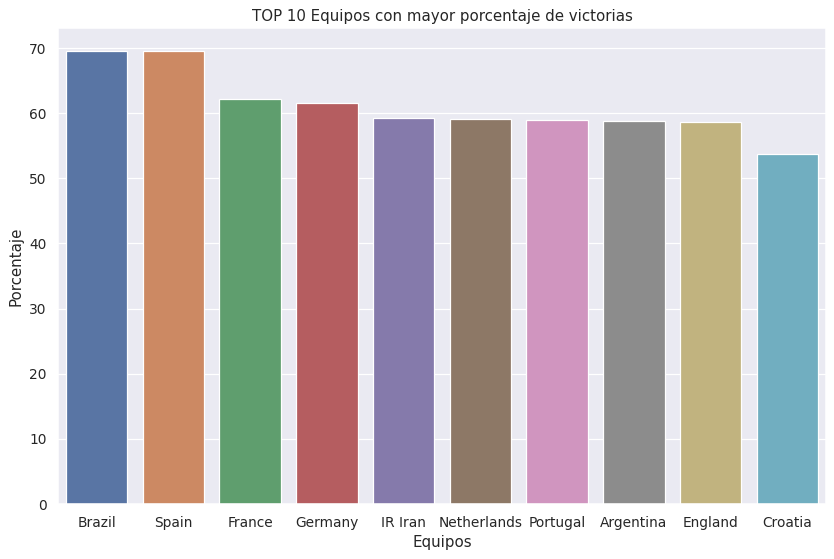

In [155]:
# Grafico de barras para visualizar la tabla previamente presentada
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=win_draw_lose[:10], x='Team', y='Win %')
#ax.bar_label(ax.containers[0])
plt.xlabel('Equipos')
plt.ylabel('Porcentaje')
plt.title('TOP 10 Equipos con mayor porcentaje de victorias');